In [67]:
from skimage import data, img_as_float
from skimage.color import rgb2gray
from numpy.linalg import svd
import numpy as np
import matplotlib.pyplot as plt

(400, 600)


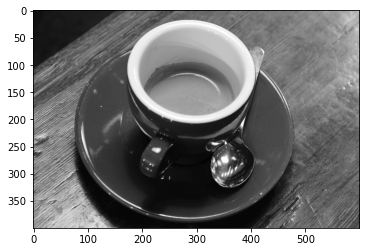

In [68]:
img = rgb2gray(img_as_float(data.coffee()))
print(img.shape)
plt.imshow(img, cmap='gray')

In [69]:
U, S, V = svd(img, full_matrices=False)
print(U.shape, S.shape, V.shape)

(400, 400) (400,) (400, 600)


In [70]:
k = 25
Sk = np.diag(S[:k])
print(U[:, :k].shape, Sk.shape, V[:, :k].shape)
compressed_img = U[:, :k] @ Sk @ V[:k, :]

(400, 25) (25, 25) (400, 25)


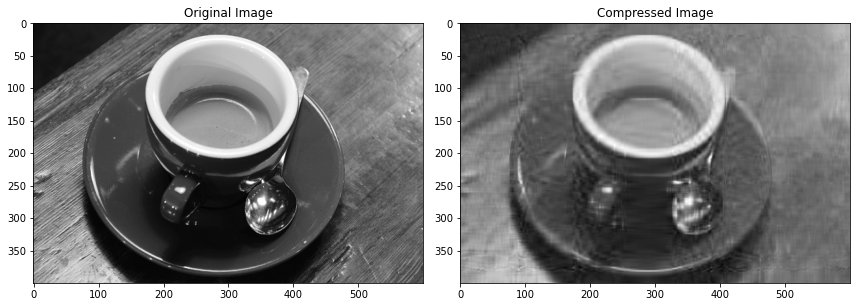

In [71]:
# plot before/after images
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
ax = axes.ravel()
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(compressed_img, cmap='gray')
ax[1].set_title("Compressed Image")
fig.tight_layout()
plt.show()

In [72]:
original_size = img.size * img.itemsize
compressed_size = Sk.size * Sk.itemsize + V[:k, :].size * V[:k, :].itemsize + U[:k, :].size * U[:k, :].itemsize
print('k =', k)
print("Original image has size", original_size, "bytes") # make this more human readable
print("Compressed image has size", compressed_size, "bytes")
print(compressed_size / original_size, "% of the original image's size")

k = 25
Original image has size 1920000 bytes
Compressed image has size 205000 bytes
0.10677083333333333 % of the original image's size
